In this notebook, we want to summarize the data and make sure that it is behaving as we expect based on previous literature. Here, we want to only use the outcome for tumor_cell_evaluation

Tumor score is defined by UCSF pathologists in the following way: <br>

0: neuropil without tumor <br>
1: infiltrating tumor margin containing a detectable but not abundant number of tumor cells <br>
2: more cellular infiltrated zone <br>
3: highly cellular tumor <br>

In [3]:
recgli = read.csv("../../ParseData/8thParse_researchPath_withInVivo.csv") 

#### In this notebook, we want to find: <br>
1. Diffusion params vs. TS using <br>
    a. No separation into ROIs <br>
    b. Visual comparison of anatomical params in separate regions <br>
    ~~c. Repeated Measures ANOVA (analysis of variance) to account for multiple samples from the same patient to see if there is true separation among tumor scores for diffusion parameters~~ <b> you can't use RMANOVA for categorical data </b> (sources: http://sherifsoliman.com/2014/12/10/ANOVA_in_R/, https://www.r-bloggers.com/two-way-anova-with-repeated-measures/, https://www.r-statistics.com/tag/ezanova/) <br> 
    c. Use GLMM associate diffusion parameters with TS, no separation <br>
    d. Use GEE to associate diffusion parameters with TS, no separation <br>
    e. Use GLMM to associate diffusion parameters with TS, separating into CEL & NEL <br>
    f. Use GEE to associate diffusion parameters with TS, separating into CEL & NEL <br>
2. Combining diffu params vs. TS using GEE 
3. Using in_CEL as a covariate in anat params using GEE 

## 0. Prep the data

In [7]:
recgli = recgli[recgli$tumor_cell_evaluation != "Ind",]
dim(recgli)
recgli = droplevels(recgli)
recgli$tumor_cell_evaluation = as.character(recgli$tumor_cell_evaluation)
recgli$tumor_cell_evaluation = as.numeric(recgli$tumor_cell_evaluation)
str(recgli$tumor_cell_evaluation)
colnames(recgli)

[1] 383  73

 num [1:383] 0 2 2 2 0 1 0 2 1 0 ...


[1] "b_number"                  "t_number"                 
 [3] "sf_number"                 "current_scan_date"        
 [5] "current_surgery_date"      "current_hist_grade"       
 [7] "current_hist_type"         "roi.label"                
 [9] "tumor_cell_evaluation"     "necrosis"                 
[11] "f8_delicate"               "f8_simple"                
[13] "f8_complex"                "mib_1"                    
[15] "bx_pure_treatment_effect"  "nfse"                     
[17] "nfl"                       "nt1c"                     
[19] "nt1v"                      "nadc.1"                   
[21] "nfa.1"                     "nev1.1"                   
[23] "nev2.1"                    "nev3.1"                   
[25] "nevrad.1"                  "nadc.2"                   
[27] "nfa.2"                     "nev1.2"                   
[29] "nev2.2"                    "nev3.2"                   
[31] "nevrad.2"                  "cbvn_nlin"                
[33] "phn_nlin"                  "phn_npar"                 
[35] "recovn_npar"               "cni"                      
[37] "ccri"                      "crni"                     
[39] "ncho"                      "ncre"                     
[41] "nnaa"                      "nlip"                     
[43] "laclip"                    "nlac"                     
[45] "olddata"                   "newdata"                  
[47] "comments"                  "notes."                   
[49] "imaging_code"              "perf_quant"               
[51] "spec_quant"                "include_anat"             
[53] "include_diffu1000"         "include_diffu2000"        
[55] "include_diffu_all"         "include_perf"             
[57] "include_spec"              "include_one_advanced_mod" 
[59] "include_all_advanced_mods" "X.CEL"                    
[61] "X.NEL"                     "X.NEC"                    
[63] "sum"                       "in_CEL"                   
[65] "in_T2all"                  "in_NEL"                   
[67] "in_NEC"                    "in_ROI"                   
[69] "desired_hist"              "multnom_out"              
[71] "no_ffpe"                   "waiting_on_path"          
[73] "rhgg_txe_analysis"

In [8]:
recgli.diffu = recgli[recgli$include_diffu_all==1,]
dim(recgli.diffu)

[1] 375  73

In [9]:
recgli = recgli.diffu 

In [10]:
recgli$t_number = as.factor(recgli$t_number)
#str(recgli)

## 1. Diffusion (b= 1000) vs. TS 

### a. No separation into ROIs

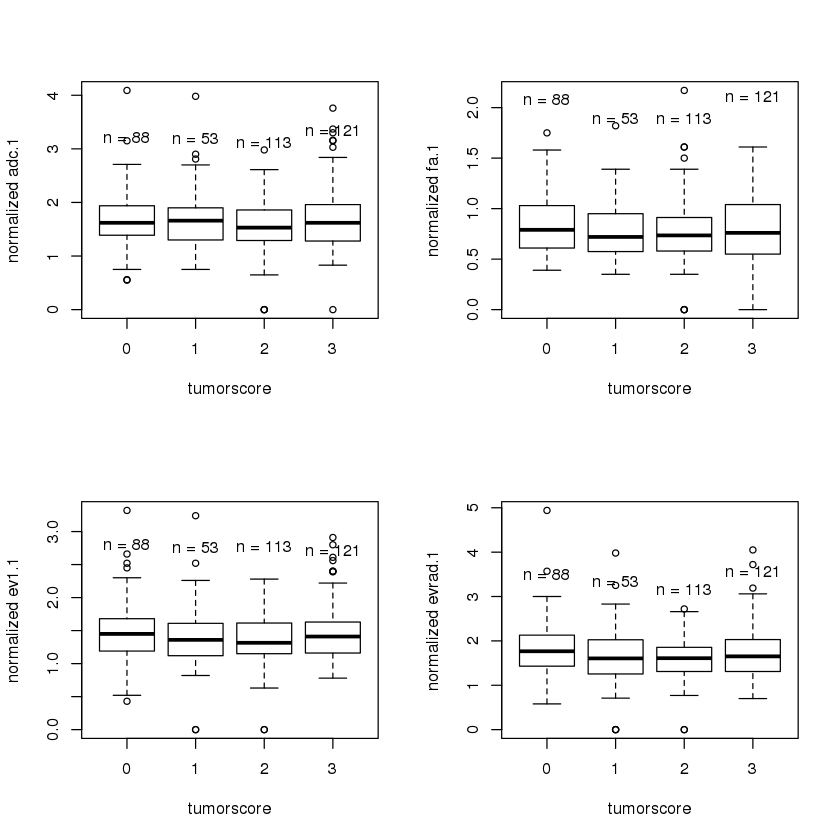

In [12]:
par(mfrow = c(2, 2))
a = boxplot(nadc.1 ~ tumor_cell_evaluation , data = recgli, ylab = "normalized adc.1", xlab = "tumorscore")
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , a$stats[nrow(a$stats) , ]+0.5 , paste("n = ",table(recgli$tumor_cell_evaluation),sep="")  )

b = boxplot(nfa.1 ~ tumor_cell_evaluation , data = recgli, ylab = "normalized fa.1", xlab = "tumorscore")
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , b$stats[nrow(b$stats) , ]+0.5 , paste("n = ",table(recgli$tumor_cell_evaluation),sep="")  )

c = boxplot(nev1.1 ~ tumor_cell_evaluation , data = recgli, ylab = "normalized ev1.1", xlab = "tumorscore")
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , c$stats[nrow(c$stats) , ]+0.5 , paste("n = ",table(recgli$tumor_cell_evaluation),sep="")  )

d = boxplot(nevrad.1 ~ tumor_cell_evaluation , data = recgli, ylab = "normalized evrad.1", xlab = "tumorscore")
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , d$stats[nrow(d$stats) , ]+0.5 , paste("n = ",table(recgli$tumor_cell_evaluation),sep="")  )


### b. CEL next to NEL scores  


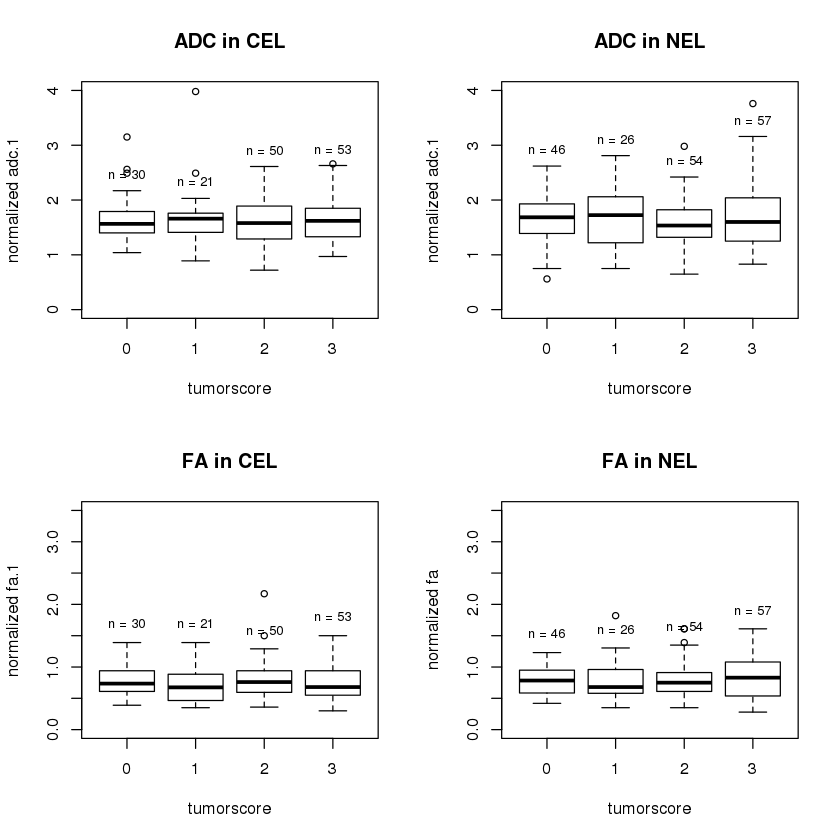

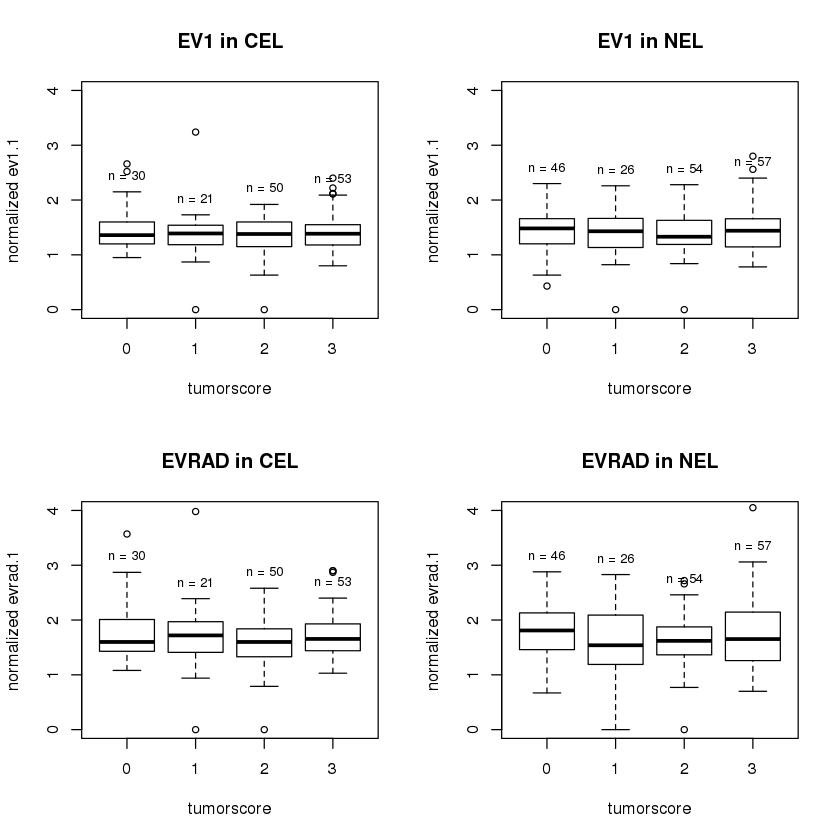

In [14]:
par(mfrow = c(2, 2))
a = boxplot(nadc.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized adc.1", xlab = "tumorscore", main = "ADC in CEL", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , a$stats[nrow(a$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_CEL ==1),]$tumor_cell_evaluation),sep=""), cex = 0.8)

b = boxplot(nadc.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized adc.1", xlab = "tumorscore", main = "ADC in NEL", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , b$stats[nrow(b$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_NEL ==1),]$tumor_cell_evaluation),sep=""), cex = 0.8)

c = boxplot(nfa.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized fa.1", xlab = "tumorscore", main = "FA in CEL", ylim = c(0,3.5))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , c$stats[nrow(c$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_CEL ==1),]$tumor_cell_evaluation),sep=""), cex = 0.8)
d = boxplot(nfa.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized fa", xlab = "tumorscore", main = "FA in NEL", ylim = c(0,3.5))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , d$stats[nrow(d$stats) , ]+.3 , paste("n = ",table(recgli[which(recgli$in_NEL ==1),]$tumor_cell_evaluation),sep=""), cex = 0.8)

e = boxplot(nev1.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized ev1.1", xlab = "tumorscore", main = "EV1 in CEL", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , e$stats[nrow(e$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)
f = boxplot(nev1.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized ev1.1", xlab = "tumorscore", main = "EV1 in NEL", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , f$stats[nrow(f$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)

g = boxplot(nevrad.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_CEL ==1,], ylab = "normalized evrad.1", xlab = "tumorscore", main = "EVRAD in CEL", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , g$stats[nrow(g$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_CEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)
h = boxplot(nevrad.1 ~ tumor_cell_evaluation , data = recgli[recgli$in_NEL ==1,], ylab = "normalized evrad.1", xlab = "tumorscore", main = "EVRAD in NEL", ylim = c(0,4))
text( c(1:nlevels(factor(recgli$tumor_cell_evaluation))) , h$stats[nrow(h$stats) , ]+.3 , paste("n = ",table(recgli[recgli$in_NEL ==1,]$tumor_cell_evaluation),sep=""), cex = 0.8)


### c. Use GLMM associate anatomical parameters with TS, no separation 

In [15]:
## I will come back to this later. 

### d. Use GEE to associate anatomical parameters with TS, no separation

In [16]:
library(glmnet)
library(geepack)
library(lme4)
#install.packages("multgee")
library("multgee")

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16

Loading required package: gnm
Loading required package: VGAM
Loading required package: stats4
Loading required package: splines


In [17]:
nadc.fit = ordLORgee(formula = tumor_cell_evaluation ~ nadc.1, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch")
summary(nadc.fit)$coefficients

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-0.91188,0.33641,-2.71062,0.00672
beta20,-0.25897,0.32700,-0.79195,0.42839
beta30,1.00482,0.33082,3.03738,0.00239
nadc.1,-0.17137,0.18182,-0.94249,0.34594


In [21]:
nfa.fit = ordLORgee(formula = tumor_cell_evaluation ~ nfa.1, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch", bstart = summary(nadc.fit)$coefficients[,1])
summary(nfa.fit)$coefficients

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-1.27252,0.46946,-2.71058,0.00672
beta20,-0.62079,0.47020,-1.32028,0.18674
beta30,0.54230,0.33711,1.60865,0.10769
nfa.1,0.18002,0.33716,0.53393,0.59339


In [22]:
nev1.fit = ordLORgee(formula = tumor_cell_evaluation ~ nev1.1, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch")
summary(nev1.fit)$coefficients

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-1.03998,0.39557,-2.62906,0.00856
beta20,-0.35200,0.39153,-0.89902,0.36864
beta30,0.79214,0.38990,2.03166,0.04219
nev1.1,-0.07832,0.25609,-0.30583,0.75974


In [25]:
nevrad.fit = ordLORgee(formula = tumor_cell_evaluation ~ nevrad.1, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch")
summary(nevrad.fit)$coefficients

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-1.02623,0.34115,-3.00814,0.00263
beta20,-0.33866,0.33612,-1.00755,0.31367
beta30,0.80427,0.33722,2.38504,0.01708
nevrad.1,-0.07361,0.18148,-0.40560,0.68503


### e. Use GLMM to associate anatomical parameters with TS, separating into CEL & NEL 

In [26]:
## need to come back to when becomes more obvious how to do GLMM with multinomial outcome... 
##can do this using a one-v-all method 

### f. Use GEE to associate anatomical parameters with TS, separating into CEL & NEL 


In [27]:
recgli_inCEL = recgli[which(recgli$in_CEL == 1),]
dim(recgli_inCEL)
is.numeric(recgli_inCEL$tumor_cell_evaluation)
head(recgli_inCEL)

[1] 154  73

[1] TRUE

,b_number,t_number,sf_number,current_scan_date,current_surgery_date,current_hist_grade,current_hist_type,roi.label,tumor_cell_evaluation,necrosis,⋯,in_CEL,in_T2all,in_NEL,in_NEC,in_ROI,desired_hist,multnom_out,no_ffpe,waiting_on_path,rhgg_txe_analysis
1,2723,6369,8122,9/13/09,9/14/09,Grade IV,Glioblastoma,10B28,0,0,⋯,1,1,0,0,1,1,TxE,0,0,1
2,2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,11B16,2,1,⋯,1,1,0,0,1,1,rHGG,0,0,1
4,2312,5317,7679,5/4/08,5/4/08,Grade IV,Glioblastoma,12B16,2,1,⋯,1,1,0,0,1,1,rHGG,0,0,1
6,2873,6709,8269,3/11/10,3/15/10,Grade IV,Glioblastoma,13B32,1,0,⋯,1,0,0,0,1,1,Ts1DNI,0,0,0
11,2222,6094,7758,8/3/08,8/4/08,Grade IV,Glioblastoma,15B18,0,0,⋯,1,1,0,0,1,1,TxE,0,0,1
13,2793,7584,8842,7/28/11,7/28/11,Grade IV,Glioblastoma,15B44,2,1,⋯,1,0,0,0,1,1,rHGG,0,0,1


In [29]:
nadc.fit2 = ordLORgee(formula = tumor_cell_evaluation ~ nadc.1, link = "logit", 
                      id = t_number, data = recgli_inCEL, LORstr = "category.exch", 
                     bstart = summary(nadc.fit)$coefficients[,1])
## for some reason this throws an error, I reported to the github and hope that there is a resolution of this issue 

ERROR: Error in fitLORgee(Y, X_mat, coeffs, ncategories, id, repeated, offset, : Please insert initial values


## 2. Combining diffusion parameters to look at different associations within the GEE model: 

In [32]:
#library(multgee)
recgli$tumor_cell_evaluation = as.character(recgli$tumor_cell_evaluation)
recgli$tumor_cell_evaluation = as.numeric(recgli$tumor_cell_evaluation)
diffu.fit = ordLORgee(formula = tumor_cell_evaluation ~ nadc.1+nfa.1+nev1.1+nevrad.1, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch")
summary(diffu.fit)$coefficients

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-1.25701,0.64740,-1.94163,0.05218
beta20,-0.56837,0.64110,-0.88655,0.37532
beta30,0.57178,0.63566,0.89949,0.36839
nadc.1,-0.16709,0.51138,-0.32675,0.74386
nfa.1,0.27585,0.51068,0.54016,0.58909
nev1.1,-0.07106,0.84842,-0.08375,0.93325
nevrad.1,0.16085,0.54838,0.29332,0.76928


## 3. Using in_CEL as a covariate in diffu params using GEE 

In [34]:
diffu.cel.fit = anat.fit = ordLORgee(formula = tumor_cell_evaluation ~ nfse+nfl+nt1c+nt1v+in_CEL, link = "logit", 
                      id = t_number, data = recgli, LORstr = "category.exch")
summary(diffu.cel.fit)$coefficients

,Estimate,san.se,san.z,Pr(>|san.z|)
beta10,-2.28341,0.69786,-3.27199,0.00107
beta20,-1.59022,0.68008,-2.33830,0.01937
beta30,-0.44032,0.65896,-0.66819,0.50401
nfse,0.12803,0.12432,1.02989,0.30306
nfl,-0.24963,0.21055,-1.18558,0.23579
nt1c,0.33927,0.22975,1.47666,0.13977
nt1v,1.17103,0.73453,1.59425,0.11088
in_CEL,-0.31248,0.26381,-1.18446,0.23623
